In [115]:
from transformers import pipeline
from PIL import Image
import requests
import cv2
import io
import os
import torch
import torch.nn.functional as F
from torchvision.transforms import Compose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


In [116]:
# load pipe
pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")

In [117]:
# example image
# url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)

In [118]:
PrintDetails = True
Path = '/home/regal/devel/ws_cacti/src/hri_cacti_xr/data/go_right/30x_4mono_10hz/20240131_162233_d_rr_go_right.avi'
OutputPath = '/home/regal/devel/ws_cacti/src/hri_cacti_xr/gesture_recognition/gesture_recogition_research/depth-anything/tests/video_rainbow.mp4'

# open video with opencv
cap = cv2.VideoCapture(Path)

# Get num frames, width, height, and frame rate
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width, frame_height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

# create writer
out = cv2.VideoWriter(OutputPath, cv2.VideoWriter_fourcc(*"mp4v"), frame_rate, (frame_width, frame_height))

if(PrintDetails): 
    print(f"num frames: '{num_frames}'")
    print(f"frame rate: '{frame_rate}'")

#Loop through each frame in the video
while(cap.isOpened()):
    
    for num_frame in range(0, num_frames):
        
        # read the current frame as a numpy array
        ret, raw_frame = cap.read()

        # check if correctly returned
        if not ret:
            break
        
        # convert to image to pass into model
        pil_image = Image.fromarray(raw_frame)
        
        # determine depth from model (from run_video.py on GitHub)
        result = pipe(pil_image)
        depth = result['predicted_depth']
        depth = F.interpolate(depth[None], (frame_height, frame_width), mode='bilinear', align_corners=False)[0, 0]
        depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0
        depth = depth.cpu().numpy().astype(np.uint8)
        depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_RAINBOW)
        
        # write to file
        out.write(depth_color)
            
    break

cap.release()
out.release()

num frames: '302'
frame rate: '10'


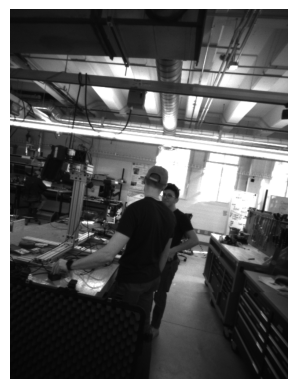

In [113]:
# show and save last raw frame
plt.imshow(raw_frame)
plt.axis('off')  # Turn off the axis
plt.savefig(f'raw.png', bbox_inches='tight', pad_inches=0)
plt.show()

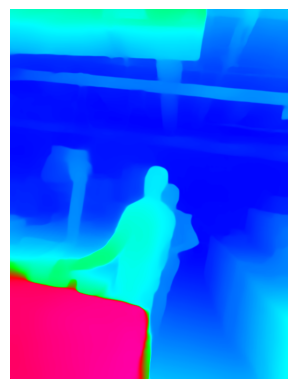

In [114]:
# show and save last depth frame
plt.imshow(depth_color)
plt.axis('off')  # Turn off the axis
plt.savefig(f'depth.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
# inference
result = pipe(pil_image)

depth = result['predicted_depth']
depth = F.interpolate(depth[None], (frame_height, frame_width), mode='bilinear', align_corners=False)[0, 0]
depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0

depth = depth.cpu().numpy().astype(np.uint8)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_BONE)

plt.imshow(depth_color)
plt.axis('off')  # Turn off the axis
plt.savefig(f'temp_depth_go_right.png', bbox_inches='tight', pad_inches=0)
plt.show()